In [3]:
from scipy import io as sio
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt


In [9]:
cd ..

C:\Users


In [145]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
GT = sio.loadmat("C:/Users/favor/Desktop/MASENE/Data for experiments/Urban4/Urban4.mat")['GT']
GT.shape


(4, 162)

In [8]:
CNN = sio.loadmat('C:/Users/favor/Desktop/MASENE/Data for experiments/Urban4/CNN-P-50.mat')['code50']
CNN= np.reshape(CNN, (94249, 50))
CNN.shape

(94249, 50)

In [14]:

def order_endmembers(endmembers, endmembersGT):
    num_endmembers = endmembers.shape[0]
    dictt = {}
    sad_mat = np.ones((num_endmembers, num_endmembers))
    for i in range(num_endmembers):
        endmembers[i, :] = endmembers[i, :] / endmembers[i, :].max()
        endmembersGT[i, :] = endmembersGT[i, :] / endmembersGT[i, :].max()
    for i in range(num_endmembers):
        for j in range(num_endmembers):
            sad_mat[i, j] = numpy_SAD(endmembers[i, :], endmembersGT[j, :])
    rows = 0
    while rows < num_endmembers:
        minimum = sad_mat.min()
        index_arr = np.where(sad_mat == minimum)
        if len(index_arr) < 2:
            break
        index = (index_arr[0][0], index_arr[1][0])
        if index[0] in dictt.keys():
            sad_mat[index[0], index[1]] = 100
        elif index[1] in dictt.values():
            sad_mat[index[0], index[1]] = 100
        else:
            dictt[index[0]] = index[1]
            sad_mat[index[0], index[1]] = 100
            rows += 1
    ASAM = 0
    num = 0
    for i in range(num_endmembers):
        if np.var(endmembersGT[dictt[i]]) > 0:
            ASAM = ASAM + numpy_SAD(endmembers[i, :], endmembersGT[dictt[i]])
            num += 1

    return dictt, ASAM / float(num)


In [15]:
def SAD(y_true, y_pred):
    y_true = tf.math.l2_normalize(y_true, axis=-1)
    y_pred = tf.math.l2_normalize(y_pred, axis=-1)
    A = (y_true * y_pred)
    sad = tf.math.acos(A)
    return sad

def numpy_SAD(y_true, y_pred):
    return np.arccos(y_pred.dot(y_true) / (np.linalg.norm(y_true) * np.linalg.norm(y_pred)))


def loss(model, original):
    reconstruction_error = SAD(model(original), original)
    return reconstruction_error

In [16]:
sadarray =[]
def plotEndmembersAndGT(endmembers, endmembersGT):
    num_endmembers = endmembers.shape[0]
    n = num_endmembers // 2  # how many digits we will display
    if num_endmembers % 2 != 0: n = n + 1
    sum = 0 

    for i in range(len(c)):
        temp = c[i]
        temparray=(itemgetter(temp[0], temp[1], temp[2],temp[3])(CNN))
        dictt,SAD = order_endmembers(np.array(temparray),GT)
        sads.append(SAD)
        

    for i in range(len(sads)):
        sum+= sads[i]
        avg = sum/len(sads)


    
    print("average SAD of all endmembers"+str(avg))
    fig = plt.figure(num=1, figsize=(8, 8))
    plt.clf()
    title = "aSAD score for all endmembers: " + format(avg, '.3f') + " radians"

    st = plt.suptitle(title)


    for i in range(4):
        endmembers[i, :] = endmembers[i, :] / endmembers[i, :].max()
        endmembersGT[i, :] = endmembersGT[i, :] / endmembersGT[i, :].max()

    for i in range(4):
        ax = plt.subplot(4, 4, i + 1)
        plt.plot(endmembers[i, :], 'r', linewidth=1.0)
        plt.plot(endmembersGT[dictt[i], :], 'k', linewidth=1.0)
        ax.set_title( str(i) + " :" + format(numpy_SAD(endmembers[i, :], endmembersGT[dictt[i], :]), '.4f'))
        ax.get_xaxis().set_visible(False)

    plt.tight_layout()
    st.set_y(0.95)
    fig.subplots_adjust(top=0.88)
    plt.draw()
    plt.pause(0.001)
    


In [27]:
from itertools import combinations
l = []
for i in range(len(CNN)):
  l.append(i)

c = []
for x in combinations(l, 4):
   c.append(x)

In [28]:
from operator import itemgetter
sads=[]
for i in range(len(c)):
  temp = c[i]
  temparray=(itemgetter(temp[0], temp[1], temp[2],temp[3])(CNN))
  d,SAD = order_endmembers(np.array(temparray),GT)
  sads.append(SAD)


In [29]:
sum = 0 
for i in range(len(sads)):
    sum+= sads[i]
print(sum)
avg = sum/len(sads)
print(avg)


0.3427177121010484
0.3427177121010484


average SAD of all endmembers0.3427177121010484


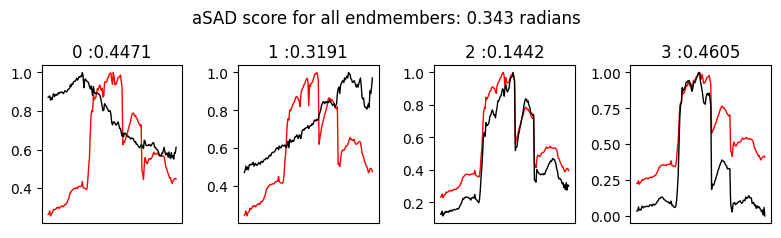

In [30]:
plotEndmembersAndGT(CNN,GT)

In [31]:
pip install fuzzy-c-means

  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [13]:
fcm = FCM(n_clusters=100)
fcm.fit(CNN)

KeyboardInterrupt: 

In [ ]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(CNN)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(CNN[:,0], CNN[:,1], alpha=.1)
axes[1].scatter(CNN[:,0], CNN[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('images/basic-clustering-output.jpg')
plt.show()